In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa
import re
import os
import warnings
import matplotlib as mpl

from tqdm import tqdm

warnings.filterwarnings("ignore")

In [92]:
%cd ../..

/home/irep/Desktop/lumen-audio


In [93]:
def read_all_names_train(split="train"):
    all_instr = os.listdir(f"./data/irmas/{split}")
    all_dirs = [
        f"./data/irmas/{split}/{i}" for i in all_instr if os.path.isdir(f"./data/irmas/{split}/{i}")
    ]
    all_files = []
    for d, instr in zip(all_dirs, all_instr):
        all_files.extend([f"./data/irmas/{split}/{instr}/{j}" for j in os.listdir(d)])
    return all_files

def find_all_features(train_names):
    instruments, drums, genre = [], [], []
    for name in train_names:
        match = re.findall("\[([^]]+)\]", name)
        if "nod" not in match and "dru" not in match:
            match.insert(1, None)
        if len(match) != 3:
            match.remove("---")
        instruments.append(match[0])
        drums.append(match[1])
        genre.append(match[2])
    return instruments, drums, genre

all_train_files = read_all_names_train("train")
instruments, drums, genre = find_all_features(all_train_files)

df_train = pd.DataFrame.from_dict({
    "path":all_train_files,
    "predominant_instrument":instruments,
    "drums":drums,
    "genres":genre
})

df_train.head()

,path,predominant_instrument,drums,genres
0,./data/irmas/train/gel/071__[gel][dru][cou_fol...,gel,dru,cou_fol
1,./data/irmas/train/gel/[gel][pop_roc]1034__3.wav,gel,None,pop_roc
2,./data/irmas/train/gel/[gel][pop_roc]0898__3.wav,gel,None,pop_roc
3,./data/irmas/train/gel/194__[gel][dru][cou_fol...,gel,dru,cou_fol
4,./data/irmas/train/gel/081__[gel][dru][pop_roc...,gel,dru,pop_roc


In [94]:
def read_all_names_test():
    all_txt = sorted([i for i in os.listdir("data/irmas/test") if i.endswith(".txt")])
    all_wav = sorted([i for i in os.listdir("data/irmas/test") if i.endswith(".wav")])
    instruments, names = [], []
    for i, j in zip(all_wav, all_txt):
        labels = [k.strip() for k in open(f"./data/irmas/test/{j}").read().split("\n") if k.strip() != ""]
        name = i
        instruments.append(labels)
        names.append(f"./data/irmas/test/{name}")
    return instruments, names
        
def count_num_songs():
    all_wavs = sorted([i for i in os.listdir("data/irmas/test") if i.endswith(".wav")])
    song_names = set(["-".join(i.split("-")[:-1]) for i in all_wavs])
    print("number of songs:", len(song_names))
    
count_num_songs()
instruments, names = read_all_names_test()

df_test = pd.DataFrame.from_dict({
    "instruments": instruments,
    "path":names
})
pattern = re.compile(r'^(.*?)-(\d{1,2})\.wav$')
df_test[['song_name', 'song_number']] = df_test['path'].str.extract(pattern)
song_groups = df_test.groupby('song_name')
song_id = 1
for name, group in song_groups:
    df_test.loc[group.index, 'song_id'] = song_id
    song_id += 1
df_test['song_id'] = df_test['song_id'].astype(int)
df_test['song_number'] = df_test['song_number'].astype(int)
df_test = df_test.sort_values(['song_id', 'song_number'], ascending=[True, True])

df_test.head(30)

number of songs: 208


,instruments,path,song_name,song_number,song_id
0,[gel],./data/irmas/test/(02) dont kill the whale-1.wav,./data/irmas/test/(02) dont kill the whale,1,1
6,"[gel, voi]",./data/irmas/test/(02) dont kill the whale-2.wav,./data/irmas/test/(02) dont kill the whale,2,1
7,"[gel, voi]",./data/irmas/test/(02) dont kill the whale-3.wav,./data/irmas/test/(02) dont kill the whale,3,1
8,[gel],./data/irmas/test/(02) dont kill the whale-4.wav,./data/irmas/test/(02) dont kill the whale,4,1
9,"[gel, voi]",./data/irmas/test/(02) dont kill the whale-6.wav,./data/irmas/test/(02) dont kill the whale,6,1
10,[gel],./data/irmas/test/(02) dont kill the whale-8.wav,./data/irmas/test/(02) dont kill the whale,8,1
11,"[gel, pia]",./data/irmas/test/(02) dont kill the whale-9.wav,./data/irmas/test/(02) dont kill the whale,9,1
1,[gel],./data/irmas/test/(02) dont kill the whale-11.wav,./data/irmas/test/(02) dont kill the whale,11,1
2,"[gel, voi]",./data/irmas/test/(02) dont kill the whale-12.wav,./data/irmas/test/(02) dont kill the whale,12,1
3,"[gel, voi]",./data/irmas/test/(02) dont kill the whale-13.wav,./data/irmas/test/(02) dont kill the whale,13,1


In [2]:
df_train = pd.read_csv("../../data/train_with_tonality.csv")
df_train.head()

,path,predominant_instrument,drums,genres,tonality,most_frequent_tone,tempo
0,./data/irmas/train/gel/071__[gel][dru][cou_fol...,gel,dru,cou_fol,D major,D,117.453835
1,./data/irmas/train/gel/[gel][pop_roc]1034__3.wav,gel,NaN,pop_roc,E minor,E,129.199219
2,./data/irmas/train/gel/[gel][pop_roc]0898__3.wav,gel,NaN,pop_roc,D minor,D,123.046875
3,./data/irmas/train/gel/194__[gel][dru][cou_fol...,gel,dru,cou_fol,D major,D,123.046875
4,./data/irmas/train/gel/081__[gel][dru][pop_roc...,gel,dru,pop_roc,B major,A#,143.554688


In [3]:
df_test = pd.read_csv("../../data/test_with_tonality.csv")
df_test.head()

,instruments,path,song_name,song_number,song_id,tonality,most_frequent_tone,tempo
0,['gel'],./data/irmas/test/(02) dont kill the whale-1.wav,./data/irmas/test/(02) dont kill the whale,1,1,E minor,B,89.102909
1,"['gel', 'voi']",./data/irmas/test/(02) dont kill the whale-2.wav,./data/irmas/test/(02) dont kill the whale,2,1,F# minor,C#,92.285156
2,"['gel', 'voi']",./data/irmas/test/(02) dont kill the whale-3.wav,./data/irmas/test/(02) dont kill the whale,3,1,F# minor,F#,92.285156
3,['gel'],./data/irmas/test/(02) dont kill the whale-4.wav,./data/irmas/test/(02) dont kill the whale,4,1,B minor,B,92.285156
4,"['gel', 'voi']",./data/irmas/test/(02) dont kill the whale-6.wav,./data/irmas/test/(02) dont kill the whale,6,1,B minor,B,92.285156


In [95]:
%cd src/notebooks
!git clone git@github.com:jackmcarthur/musical-key-finder.git

/home/irep/Desktop/lumen-audio/src/notebooks
fatal: destination path 'musical-key-finder' already exists and is not an empty directory.


In [10]:
%cd musical-key-finder

/home/irep/Desktop/lumen-audio/src/notebooks/musical-key-finder


In [11]:
from keyfinder import *

In [7]:
%cd ../../../

/home/irep/Desktop


In [121]:
def filter_smaller(d, threshold=0.6):
    return {k:v for k, v in d.items() if v < threshold}

audio_path = df_test.iloc[0]["path"]
y, sr = librosa.load(audio_path)
y_harmonic, y_percussive = librosa.effects.hpss(y)
tonality = Tonal_Fragment(y_harmonic, sr)
print(tonality.key_dict)
ipd.Audio(audio_path)

{'C major': 0.357, 'C# major': -0.569, 'D major': 0.233, 'D# major': -0.544, 'E major': 0.469, 'F major': 0.019, 'F# major': -0.119, 'G major': 0.446, 'G# major': -0.736, 'A major': 0.29, 'A# major': -0.241, 'B major': 0.395, 'C minor': -0.254, 'C# minor': -0.014, 'D minor': 0.014, 'D# minor': -0.246, 'E minor': 0.77, 'F minor': -0.423, 'F# minor': 0.012, 'G minor': -0.18, 'G# minor': -0.167, 'A minor': 0.295, 'A# minor': -0.379, 'B minor': 0.572}


In [125]:
tonality.print_chroma()

C 	 0.783
C# 	 0.709
D 	 0.744
D# 	 0.646
E 	 0.986
F 	 0.750
F# 	 0.775
G 	 0.770
G# 	 0.492
A 	 0.722
A# 	 0.673
B 	 1.000


In [133]:
def find_tonality(x):
    audio_path = x["path"]
    y, sr = librosa.load(audio_path)
    y_harmonic, _ = librosa.effects.hpss(y)
    tonality = Tonal_Fragment(y_harmonic, sr)
    return max(tonality.key_dict, key=tonality.key_dict.get)

tqdm.pandas()

df_train["tonality"] = df_train.progress_apply(find_tonality, axis=1)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6705/6705 [17:48<00:00,  6.27it/s]


In [137]:
df_test["tonality"] = df_test.progress_apply(find_tonality, axis=1)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2874/2874 [40:30<00:00,  1.18it/s]


In [138]:
def find_most_frequent_tone(x):
    audio_path = x["path"]
    y, sr = librosa.load(audio_path)
    y_harmonic, _ = librosa.effects.hpss(y)
    tonality = Tonal_Fragment(y_harmonic, sr)
    return max(tonality.keyfreqs, key=tonality.keyfreqs.get)

df_train["most_frequent_tone"] = df_train.progress_apply(find_most_frequent_tone, axis=1)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6705/6705 [20:37<00:00,  5.42it/s]


In [139]:
df_test["most_frequent_tone"] = df_test.progress_apply(find_most_frequent_tone, axis=1)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2874/2874 [42:30<00:00,  1.13it/s]


In [83]:
#!ls
#df_train.to_csv("./data/train_with_tonality.csv", index=False)
#df_test.to_csv("./data/test_with_tonality.csv", index=False)

data	    img		  pyproject.toml	requirements.txt  test.sh
Dockerfile  Makefile	  README.md		setup.py
docs	    models	  references		src
figures     models_quick  requirements-dev.txt	src.egg-info


In [142]:
set(df_train["genres"].tolist())

{'cla', 'cou_fol', 'jaz_blu', 'lat_sou', 'pop_roc'}

## Minor or major tonality?

- Classical music - no expectations
- Country folk    - probably more major than minor
- Jazz Blues      - more minor, probably E, A and D minor mostly
- Latin soul      - more major
- Pop rock        - more minor

In [5]:
COLOR="darkblue"

3341 3364


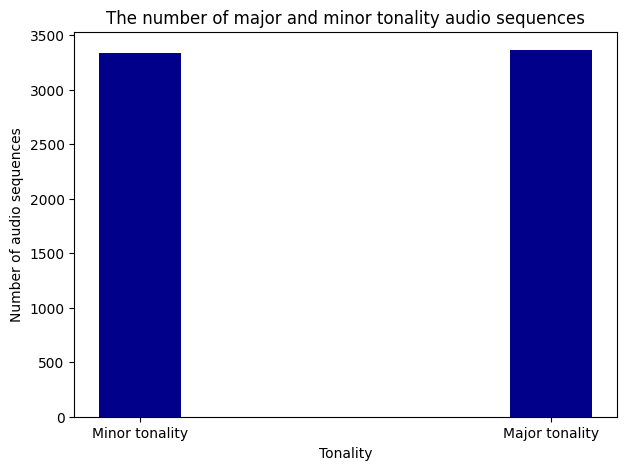

In [10]:
def draw_overall_bar_tonality():
    plt.figure(figsize=(7, 5))
    genre_audio = df_train.copy()
    genre_audio["minor_major"] = genre_audio.apply(lambda x: x["tonality"].split(" ")[-1], axis=1)

    len_minor = len(genre_audio[genre_audio["minor_major"] == "minor"])
    len_major = len(genre_audio[genre_audio["minor_major"] == "major"])
    print(len_minor, len_major)
    plt.bar(
        ["Minor tonality", "Major tonality"],
        [len_minor, len_major],
        width=0.2,
        color=COLOR
    )
        
    plt.title(f"The number of major and minor tonality audio sequences")
    plt.xlabel("Tonality")
    plt.ylabel("Number of audio sequences")
    plt.savefig(f"./figures/minor_major_tonality.png")

draw_overall_bar_tonality()

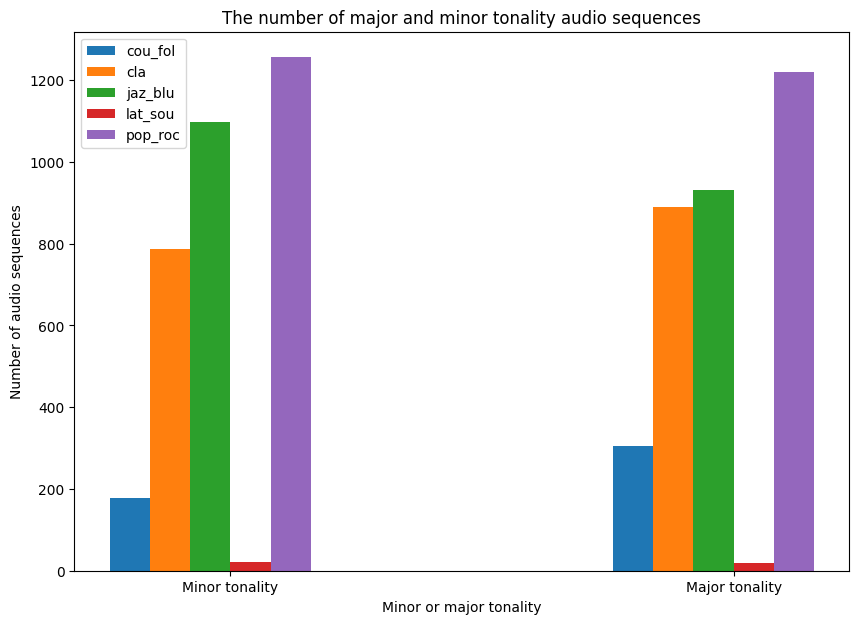

In [21]:
def draw_bar_tonality():
    plt.figure(figsize=(10, 7))
    X_axis = np.arange(2)
    plt.xticks(X_axis, ["Minor tonality", "Major tonality"])
    
    genres = set(df_train["genres"].tolist())
    num_genres = len(genres)
    one_width = 0.08
    whole_width = num_genres * one_width
    
    for i, g in enumerate(genres):
        genre_audio = df_train[df_train["genres"] == g]
        genre_audio["minor_major"] = genre_audio.apply(lambda x: x["tonality"].split(" ")[-1], axis=1)
        
        plt.bar(
            X_axis - whole_width/2 + i * one_width,
            [len(genre_audio[genre_audio["minor_major"] == "minor"]), len(genre_audio[genre_audio["minor_major"] == "major"])],
            width=one_width,
            label=g
        )
        
    plt.title(f"The number of major and minor tonality audio sequences")
    plt.xlabel("Minor or major tonality")
    plt.ylabel("Number of audio sequences")
    plt.legend()
    plt.savefig(f"./figures/minor_major_tonality_wrt_genre.png")

draw_bar_tonality()

- Pop rock assumption - barely holds, probably covers more than one genre
- Jazz blues assumption - holds!
- Latin soul - too small sample
- Country folk - holds!

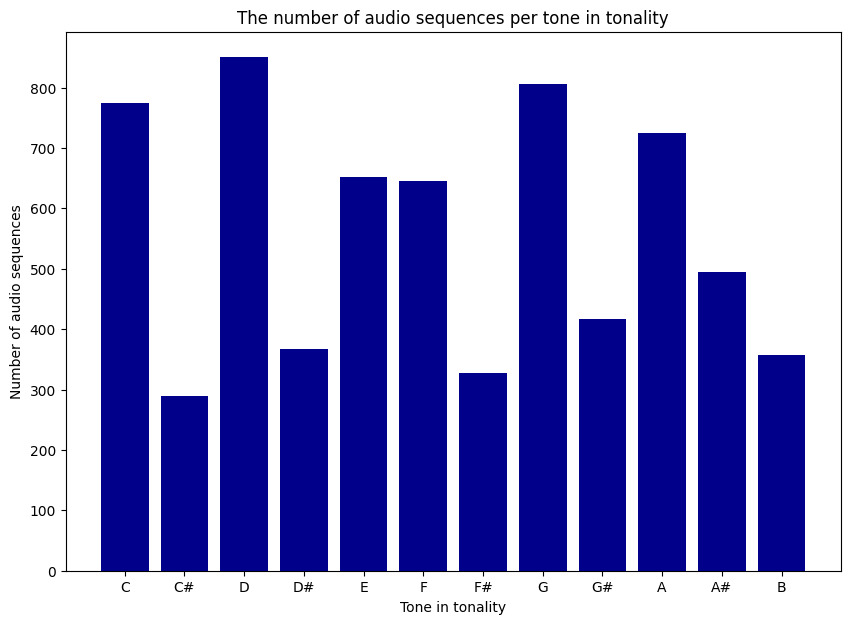

In [22]:
def draw_overall_tone_tonality():
    plt.figure(figsize=(10, 7))
    tones = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]

    tone_audio = df_train.copy()
    tone_audio["tone"] = tone_audio.apply(lambda x: x["tonality"].split(" ")[0], axis=1)
    plt.bar(
        tones,
        [tone_audio[tone_audio["tone"] == i].shape[0] for i in tones],
        color=COLOR,
        width=0.8
    )
        
    plt.title(f"The number of audio sequences per tone in tonality")
    plt.xlabel("Tone in tonality")
    plt.ylabel("Number of audio sequences")
    plt.savefig(f"./figures/overall_tone_tonality.png")
    
draw_overall_tone_tonality()

(2476, 7)


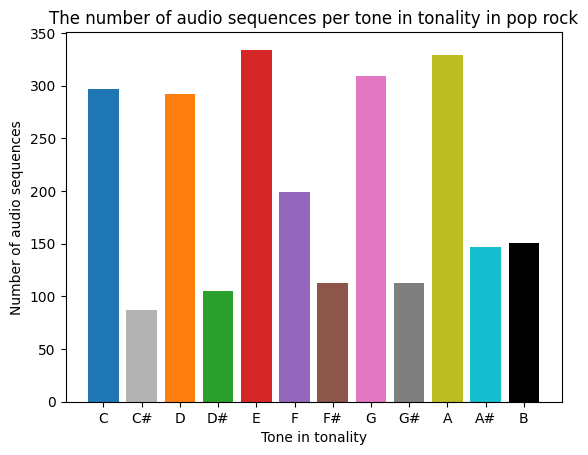

(42, 7)


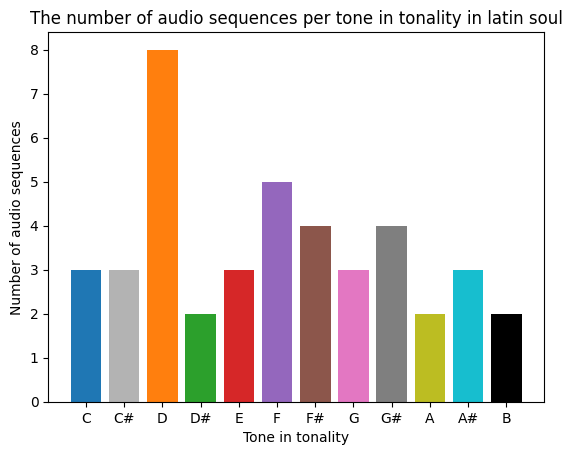

(1675, 7)


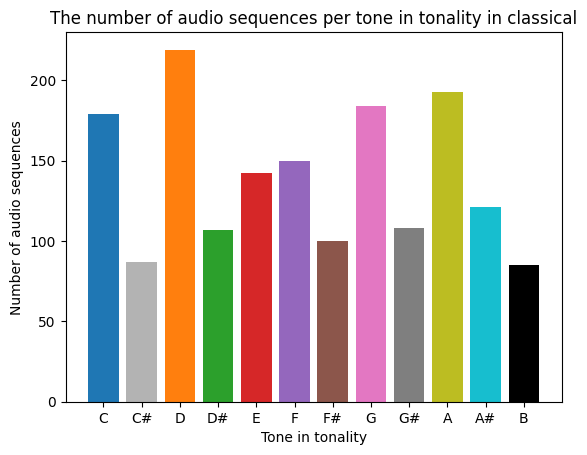

(482, 7)


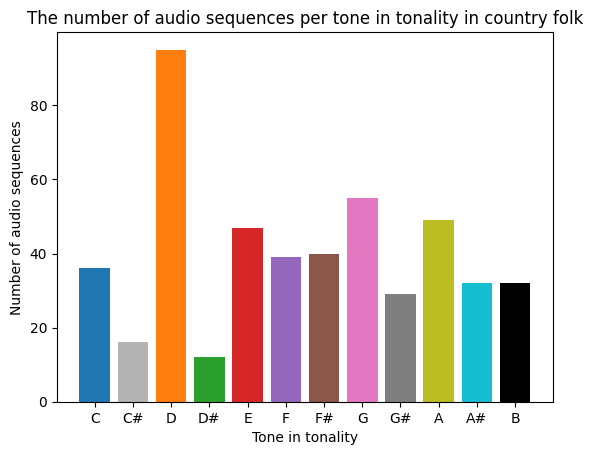

(2030, 7)


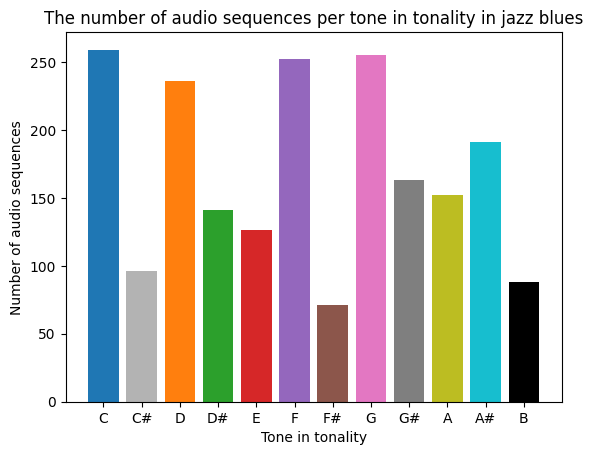

In [15]:
def draw_tone_tonality_per_genre():
    tones = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]
    cmap = plt.get_cmap("tab10", len(tones))
    custom_palette = [mpl.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]
    custom_palette[-1] = [0, 0, 0]
    custom_palette[1] = [0.7, 0.7, 0.7]

    genres = ["pop_roc", "lat_sou", "cla", "cou_fol", "jaz_blu"]
    long_names = ["pop rock", "latin soul", "classical", "country folk", "jazz blues"]
    for i, (g, n) in enumerate(zip(genres, long_names)):
        tone_audio = df_train[df_train["genres"] == g]
        print(tone_audio.shape)
        tone_audio["tone"] = tone_audio.apply(lambda x: x["tonality"].split(" ")[0], axis=1)

        plt.bar(
            tones,
            [tone_audio[tone_audio["tone"] == i].shape[0] for i in tones],
            color=custom_palette,
            width=0.8
        )

        plt.title(f"The number of audio sequences per tone in tonality in {n}")
        plt.xlabel("Tone in tonality")
        plt.ylabel("Number of audio sequences")
        plt.savefig(f"./figures/{g}_tone_tonality.png")
        plt.show()
    
draw_tone_tonality_per_genre()

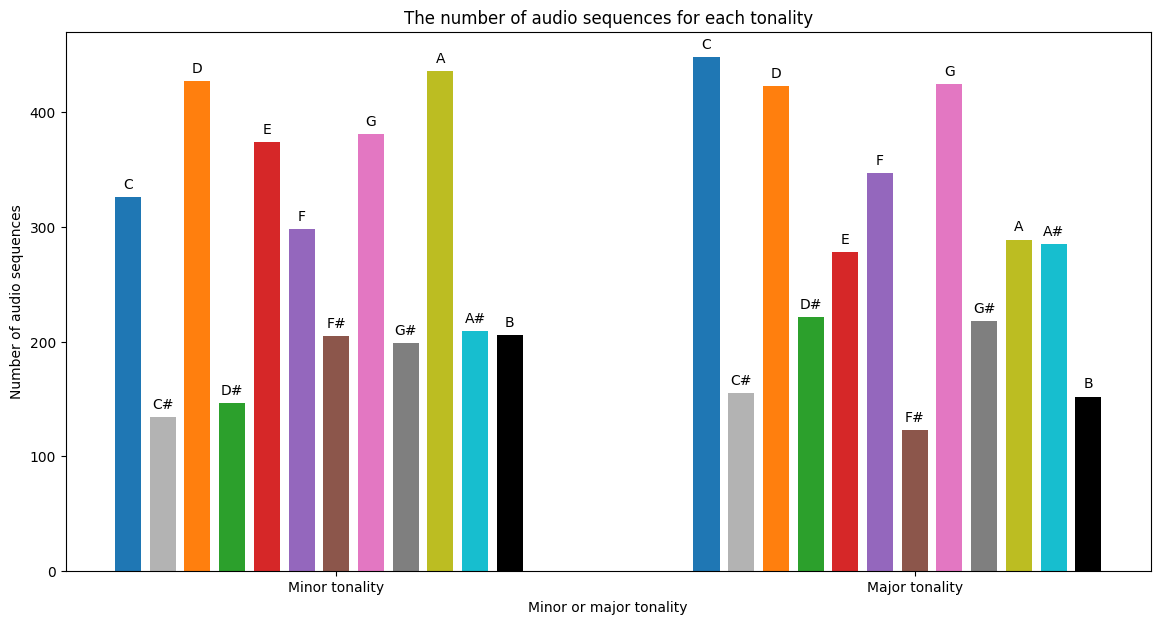

In [20]:
def draw_overall_tone_tonality_full():
    plt.figure(figsize=(14, 7))
    X_axis = np.arange(2)
    
    
    tones = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]
    cmap = plt.get_cmap("tab10", len(tones))
    custom_palette = [mpl.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]
    custom_palette[-1] = [0, 0, 0]
    custom_palette[1] = [0.7, 0.7, 0.7]
    num_tones = len(tones)
    one_width = 0.06
    whitespace = 0.015
    whole_width = num_tones * one_width
    
    genre_audio = df_train.copy()
    genre_audio["tone"] = genre_audio.apply(lambda x: x["tonality"].split(" ")[0], axis=1)
    genre_audio["minor_major"] = genre_audio.apply(lambda x: x["tonality"].split(" ")[-1], axis=1)
    
    for i, t in enumerate(["minor", "major"]):
        genre_minor_major = genre_audio[genre_audio["minor_major"] == t]
        for j, t2 in enumerate(tones):
            genre_minor_major_tone = genre_minor_major[genre_minor_major["tone"] == t2]
            if i == 0:
                bar=plt.bar(
                    X_axis[i] - whole_width/2 + j * one_width,
                    genre_minor_major_tone.shape[0],
                    width=one_width - whitespace,
                    color=custom_palette[j],
                    label=t2
                )
            else:
                bar=plt.bar(
                    X_axis[i] - whole_width/2 + j * one_width,
                    genre_minor_major_tone.shape[0],
                    width=one_width - whitespace,
                    color=custom_palette[j]
                )
            rect = bar[0]
            height = rect.get_height()
            plt.text(rect.get_x() + rect.get_width() / 2.0, height+5, t2, ha='center', va='bottom')

    plt.xticks(X_axis, ["Minor tonality", "Major tonality"])
    plt.title(f"The number of audio sequences for each tonality")
    plt.xlabel("Minor or major tonality")
    plt.ylabel("Number of audio sequences")
    plt.savefig(f"./figures/full_overall_tonality.png")

    
draw_overall_tone_tonality_full()

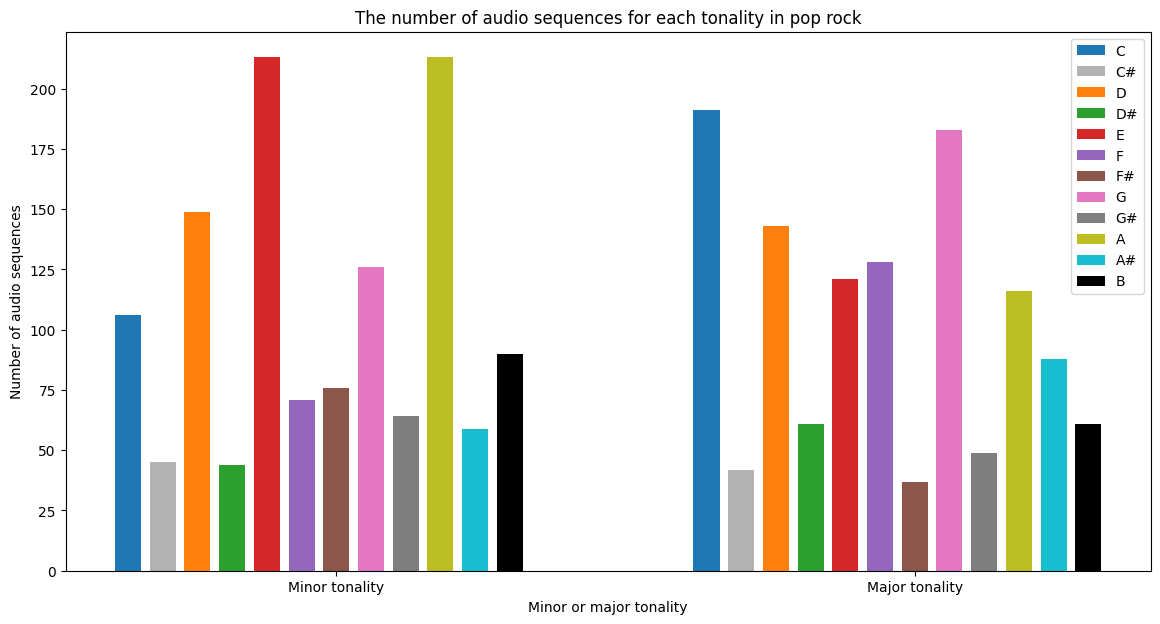

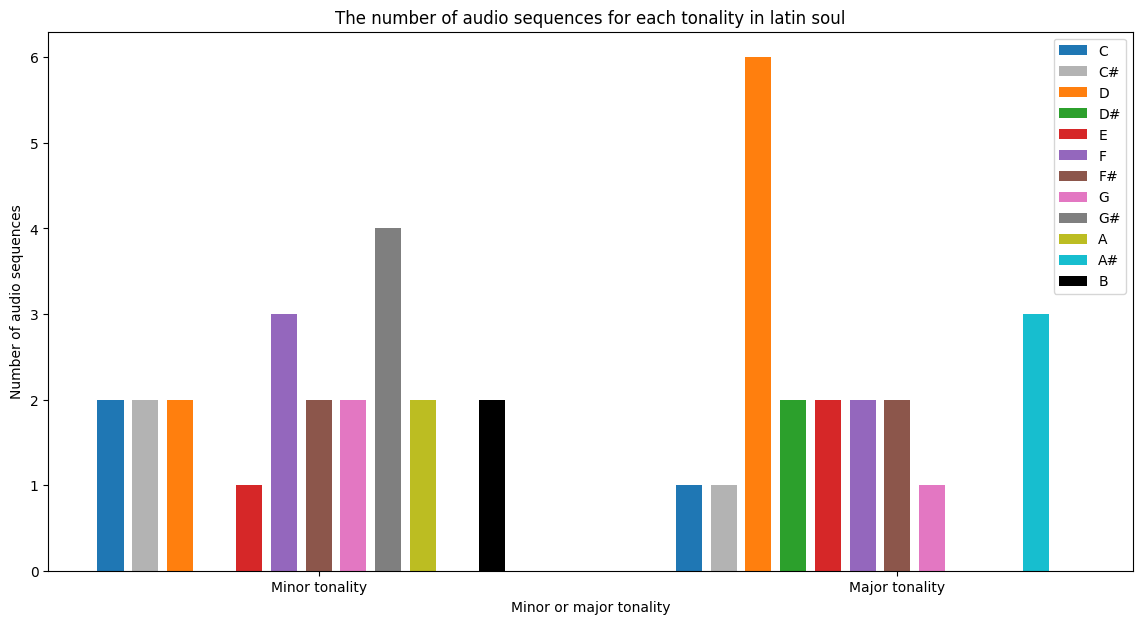

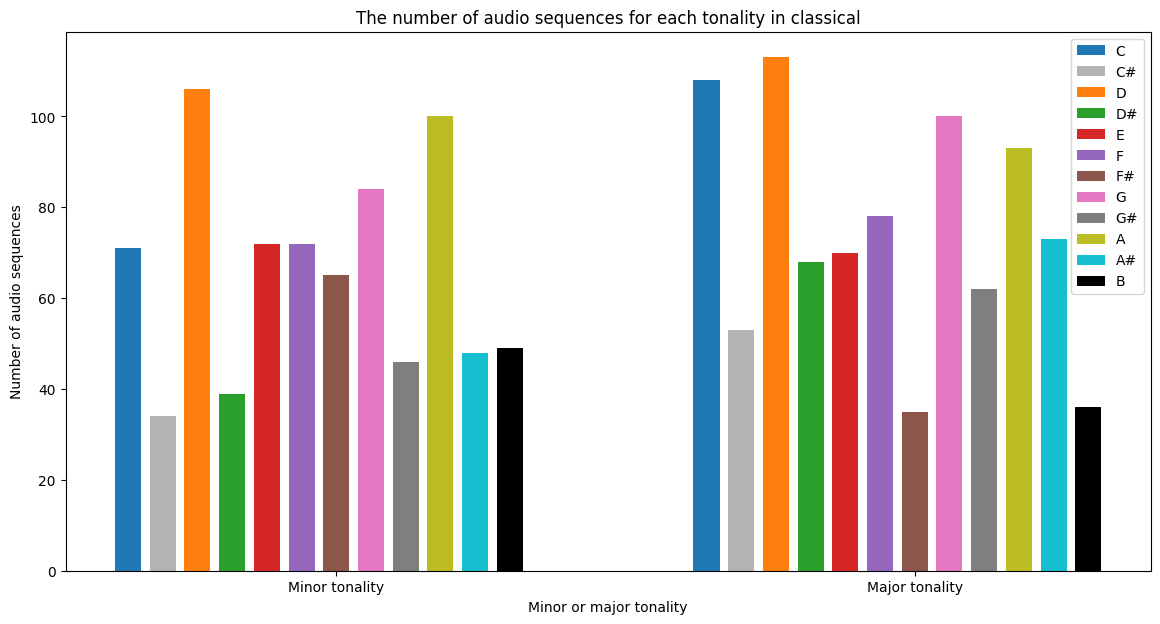

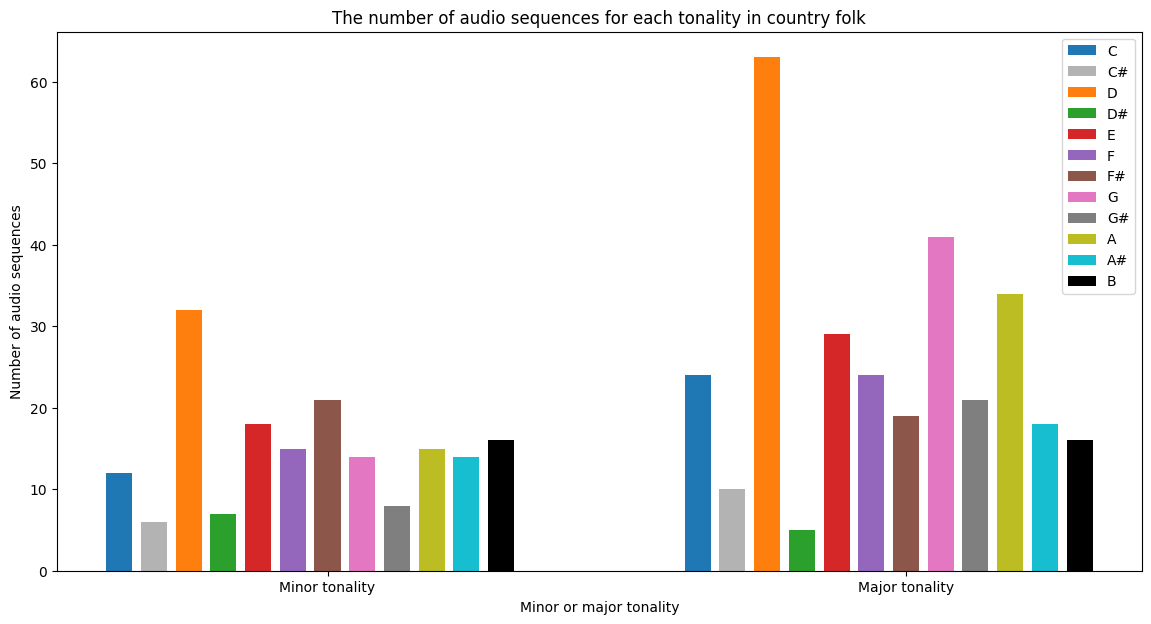

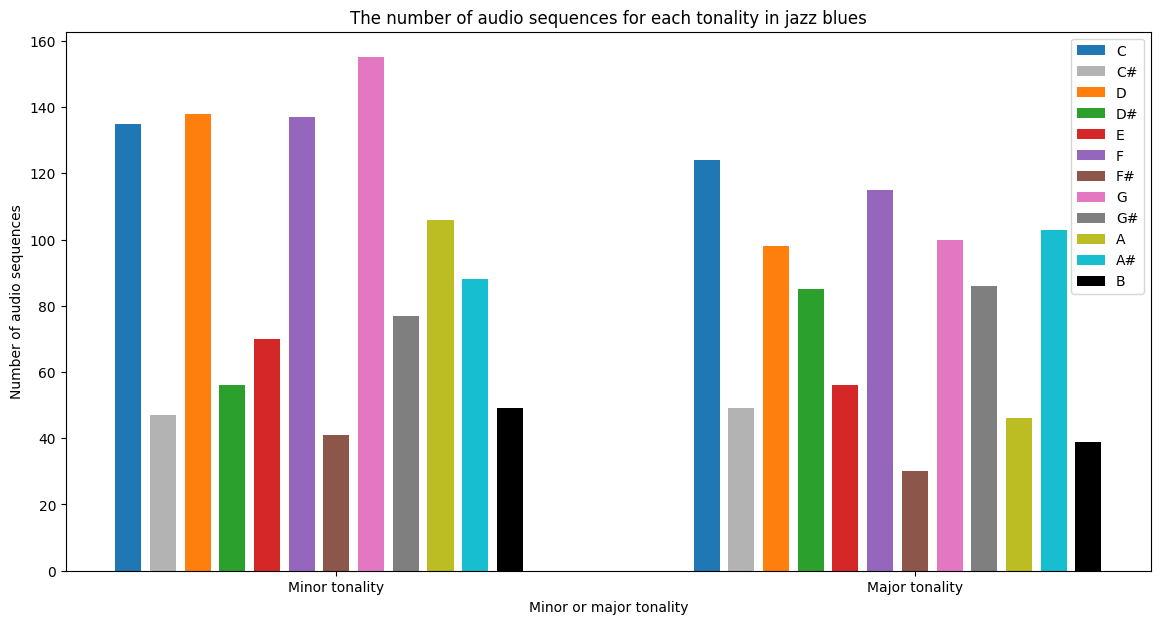

In [25]:
def draw_tone_tonality_full_per_genre():
    X_axis = np.arange(2)
    
    
    tones = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]
    cmap = plt.get_cmap("tab10", len(tones))
    custom_palette = [mpl.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]
    custom_palette[-1] = [0, 0, 0]
    custom_palette[1] = [0.7, 0.7, 0.7]
    num_tones = len(tones)
    one_width = 0.06
    whitespace = 0.015
    whole_width = num_tones * one_width
    
    short_names = ["pop_roc", "lat_sou", "cla", "cou_fol", "jaz_blu"]
    long_names = ["pop rock", "latin soul", "classical", "country folk", "jazz blues"]
    for k, (g, n) in enumerate(zip(short_names, long_names)):
        plt.figure(figsize=(14, 7))
        genre_audio = df_train[df_train["genres"] == g]
        genre_audio["tone"] = genre_audio.apply(lambda x: x["tonality"].split(" ")[0], axis=1)
        genre_audio["minor_major"] = genre_audio.apply(lambda x: x["tonality"].split(" ")[-1], axis=1)
        for i, t in enumerate(["minor", "major"]):
            genre_minor_major = genre_audio[genre_audio["minor_major"] == t]
            for j, t2 in enumerate(tones):
                genre_minor_major_tone = genre_minor_major[genre_minor_major["tone"] == t2]
                if i == 0:
                    plt.bar(
                        X_axis[i] - whole_width/2 + j * one_width,
                        genre_minor_major_tone.shape[0],
                        width=one_width - whitespace,
                        color=custom_palette[j],
                        label=t2
                    )
                else:
                    plt.bar(
                        X_axis[i] - whole_width/2 + j * one_width,
                        genre_minor_major_tone.shape[0],
                        width=one_width - whitespace,
                        color=custom_palette[j]
                    )
        

        plt.xticks(X_axis, ["Minor tonality", "Major tonality"])
        plt.title(f"The number of audio sequences for each tonality in {n}")
        plt.xlabel("Minor or major tonality")
        plt.ylabel("Number of audio sequences")
        plt.legend()
        plt.savefig(f"./figures/{g}_full_tonality.png")
        plt.show()

    
draw_tone_tonality_full_per_genre()

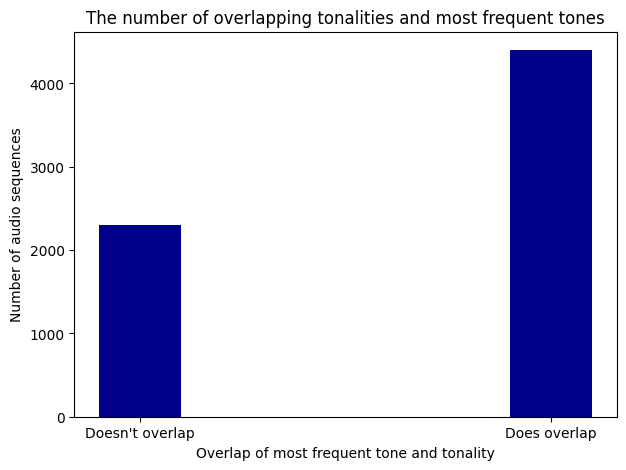

In [21]:
def draw_overall_overlapping_most_freq_tone_and_tonality():
    plt.figure(figsize=(7, 5))
    genre_audio = df_train.copy()
    genre_audio["tone"] = genre_audio.apply(lambda x: x["tonality"].split(" ")[0], axis=1)

    plt.bar(
        ["Doesn't overlap", "Does overlap"],
        [len(genre_audio[genre_audio["tone"] != genre_audio["most_frequent_tone"]]), 
         len(genre_audio[genre_audio["tone"] == genre_audio["most_frequent_tone"]])
        ],
        width=0.2,
        color=COLOR
    )
  
    plt.title(f"The number of overlapping tonalities and most frequent tones")
    plt.xlabel("Overlap of most frequent tone and tonality")
    plt.ylabel("Number of audio sequences")
    plt.savefig(f"./figures/overall_overlapping_most_freq_tone_and_tonality.png")
draw_overall_overlapping_most_freq_tone_and_tonality()

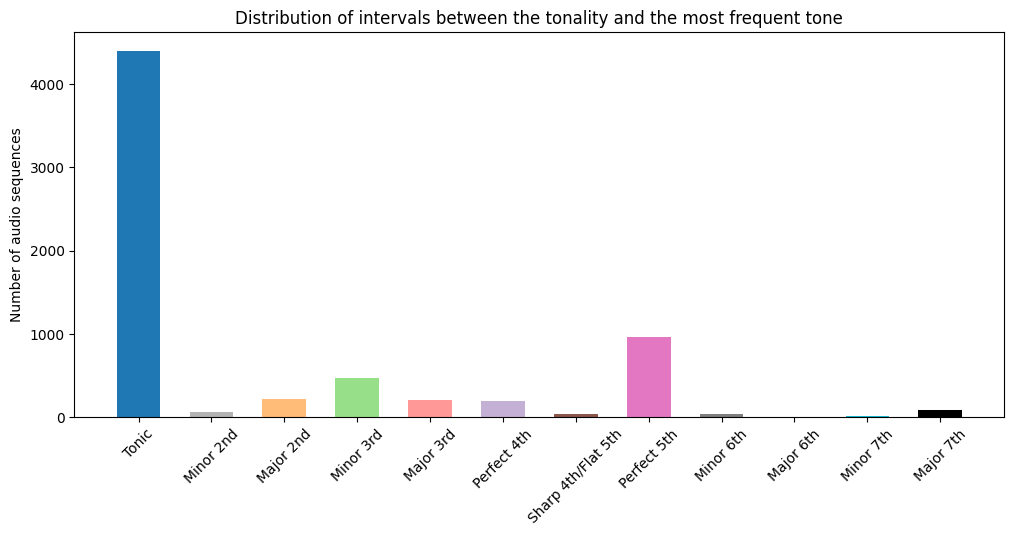

In [62]:
def draw_tonalities_and_most_frequent_wrt_intervals():
    plt.figure(figsize=(12, 5))
    tones = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]
    cmap = plt.get_cmap("tab20", len(tones))
    custom_palette = [mpl.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]
    custom_palette[-1] = [0, 0, 0]
    custom_palette[1] = [0.7, 0.7, 0.7]
    one_width=0.6

    # poredak je bitan kod zvanja funkcija
    tonic = lambda x, y: y == tones[(tones.index(x) + 0) % len(tones)]
    minor2 = lambda x, y: y == tones[(tones.index(x) + 1) % len(tones)]
    major2 = lambda x, y: y == tones[(tones.index(x) + 2) % len(tones)]
    minor3 = lambda x, y: y == tones[(tones.index(x) + 3) % len(tones)]
    major3 = lambda x, y: y == tones[(tones.index(x) + 4) % len(tones)]
    perf4 = lambda x, y: y == tones[(tones.index(x) + 5) % len(tones)]
    sharp4_flat5 = lambda x, y: y == tones[(tones.index(x) + 6) % len(tones)]
    perf5 = lambda x, y: y == tones[(tones.index(x) + 7) % len(tones)]
    minor6 = lambda x, y: y == tones[(tones.index(x) + 8) % len(tones)]
    major6 = lambda x, y: y == tones[(tones.index(x) + 9) % len(tones)]
    minor7 = lambda x, y: y == tones[(tones.index(x) + 10) % len(tones)]
    major7 = lambda x, y: y == tones[(tones.index(x) + 11) % len(tones)]
    
    names = [
        "Tonic", "Minor 2nd", "Major 2nd", "Minor 3rd", "Major 3rd", 
        "Perfect 4th", "Sharp 4th/Flat 5th", "Perfect 5th",
        "Minor 6th", "Major 6th", "Minor 7th", "Major 7th"
    ]
    
    interval_functions = [
        tonic, minor2, major2, minor3, major3, perf4, sharp4_flat5, perf5, minor6, major6, minor7, major7
    ]
    
    all_lens = []
    for i, int_f in enumerate(interval_functions):
        df_tmp = df_train.copy()
        df_tmp["tone"] = df_tmp.apply(lambda x: x["tonality"].split(" ")[0], axis=1)
        
        mask = df_tmp.apply(lambda row: int_f(row["tone"], row["most_frequent_tone"]), axis=1)
        df_tmp = df_tmp[mask]
        
        all_lens.append(df_tmp.shape[0])
    
    plt.bar(
        names,
        all_lens,
        width=one_width,
        color=custom_palette,
        label=names
    )
    plt.title("Distribution of intervals between the tonality and the most frequent tone")
    plt.ylabel("Number of audio sequences")
    plt.xticks(rotation=45)
    plt.savefig("./figures/distribution_intervals_most_freq_tone.png")
    
draw_tonalities_and_most_frequent_wrt_intervals()

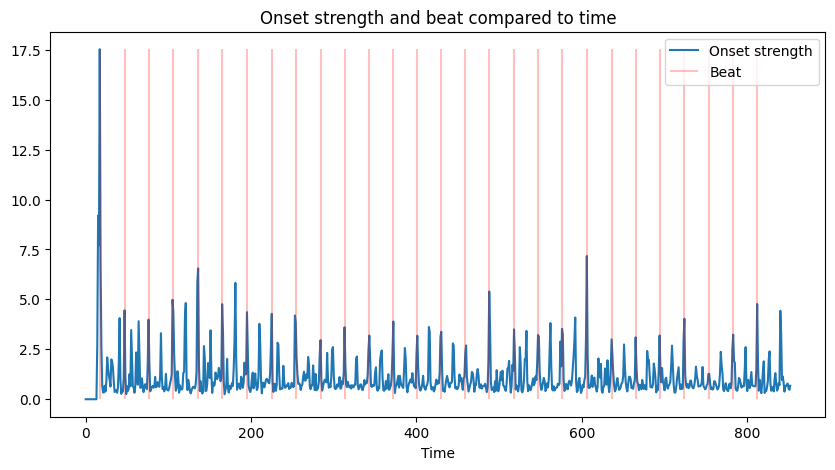

Tempo: 89.10290948275862


In [63]:
def draw_signal_beats():
    plt.figure(figsize=(10, 5))
    audio_path = df_test.iloc[0]["path"]
    y, sr = librosa.load(audio_path)
    onset_envelope = librosa.onset.onset_strength(y=y, sr=sr)
    tempo, beats = librosa.beat.beat_track(onset_envelope=onset_envelope)
    plt.plot(onset_envelope, label="Onset strength")
    plt.vlines(beats, 0, onset_envelope.max(), color="r", alpha=0.25, label="Beat")
    plt.xlabel("Onset strength")
    plt.xlabel("Time")
    plt.title("Onset strength and beat compared to time")
    plt.legend()
    plt.savefig("./figures/onset_beat_plot.png")
    plt.show()
    print("Tempo:",tempo)
    
    
draw_signal_beats()

In [60]:
def calculate_tempo(x):
    y, sr = librosa.load(x["path"])
    onset_envelope = librosa.onset.onset_strength(y=y, sr=sr)
    tempo, beats = librosa.beat.beat_track(onset_envelope=onset_envelope)
    return tempo

tqdm.pandas()
df_train["tempo"] = df_train.progress_apply(calculate_tempo, axis=1)

100%|███████████████████████████████████████| 6705/6705 [04:35<00:00, 24.33it/s]


In [61]:
df_test["tempo"] = df_test.progress_apply(calculate_tempo, axis=1)

100%|███████████████████████████████████████| 2874/2874 [09:01<00:00,  5.31it/s]


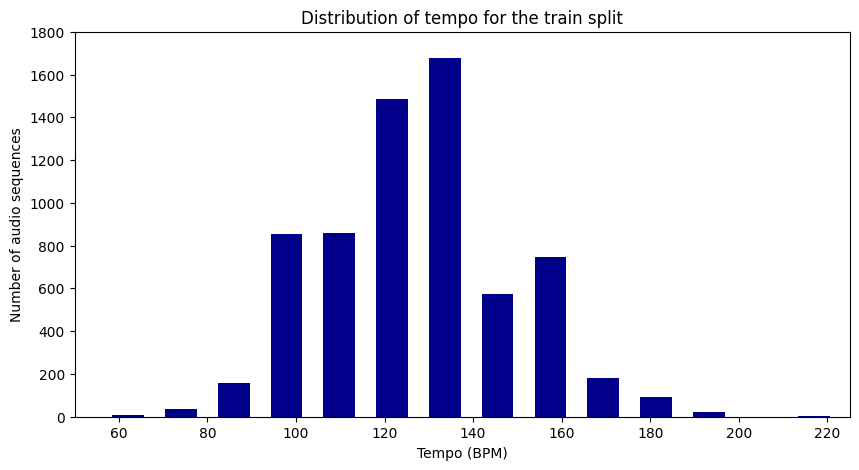

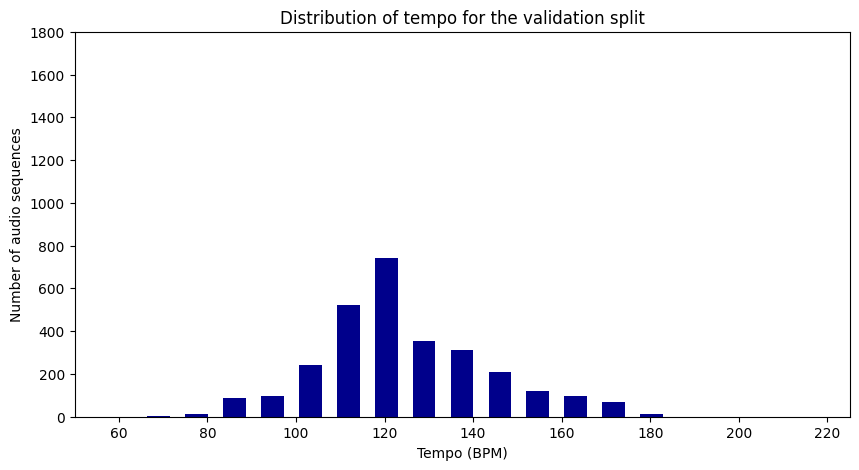

In [80]:
def draw_tempo_distribution(df, split):
    plt.figure(figsize=(10, 5))
    plt.hist(df["tempo"], bins=15, rwidth=0.6, color=COLOR)
    plt.title(f"Distribution of tempo for the {split} split")
    plt.xlim([50, 225])
    plt.ylim([0, 1800])
    plt.xlabel("Tempo (BPM)")
    plt.ylabel("Number of audio sequences")
    plt.savefig(f"./figures/tempo_distribution_{split}.png")
    
draw_tempo_distribution(df_train, "train")
draw_tempo_distribution(df_test, "validation")

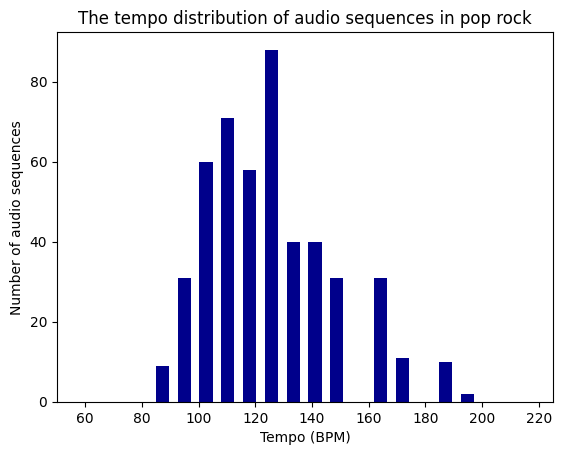

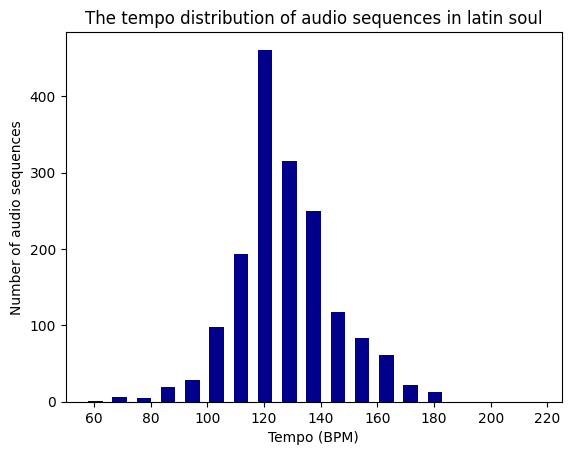

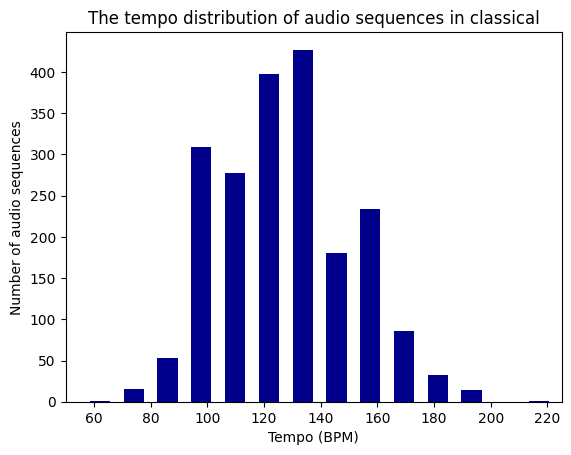

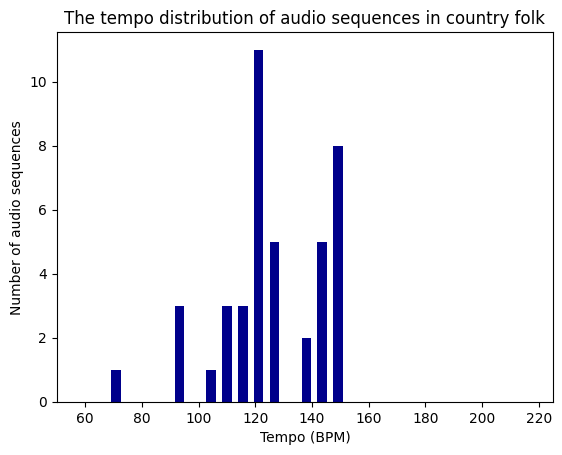

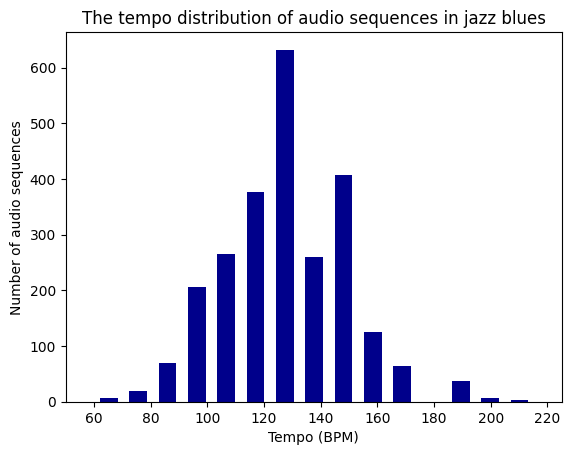

In [86]:
def draw_tempo_distribution_per_genre():
    genres = set(df_train["genres"].tolist())
    long_names = ["pop rock", "latin soul", "classical", "country folk", "jazz blues"]
    for i, (g, n) in enumerate(zip(genres, long_names)):
        tone_audio = df_train[df_train["genres"] == g]
        plt.hist(tone_audio["tempo"], bins=15, rwidth=0.6, color=COLOR)

        plt.title(f"The tempo distribution of audio sequences in {n}")
        plt.xlabel("Tempo (BPM)")
        plt.ylabel("Number of audio sequences")
        plt.xlim([50, 225])
        plt.savefig(f"./figures/tempo_distribution_genre_{g}.png")
        plt.show()
    
draw_tempo_distribution_per_genre()